In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('../experiment_results/Topology_size_full_18.06/results.csv')
dfhh = pd.read_csv('../experiment_results/Topology_size_hh_15.06/results.csv')
df_combined = pd.concat([df, dfhh], ignore_index=True)

In [11]:
df = df_combined

In [12]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,300,bacon,bposd,17,17,1000,constant,0.002,0.002,NaN,NaN,NaN
1,custom_full,350,bacon,bposd,17,17,1000,constant,0.002,0.001,NaN,NaN,NaN
2,custom_full,300,bacon,bposd,17,17,1000,modsi1000,0.002,0.014,NaN,NaN,NaN
3,custom_full,400,bacon,bposd,19,19,1000,constant,0.002,0.001,NaN,NaN,NaN
4,custom_full,350,bacon,bposd,17,17,1000,modsi1000,0.002,0.015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,custom_heavyhex,546,surface,bposd,13,13,1000,modsi1000,0.002,0.485,NaN,NaN,NaN
326,custom_heavyhex,546,surface,bposd,13,13,1000,modsi1000,0.008,0.502,NaN,NaN,NaN
327,custom_heavyhex,546,surface,bposd,13,13,1000,constant,0.008,0.499,NaN,NaN,NaN
328,custom_heavyhex,546,surface,bposd,13,13,1000,modsi1000,0.004,0.486,NaN,NaN,NaN


In [13]:
import matplotlib.pyplot as plt

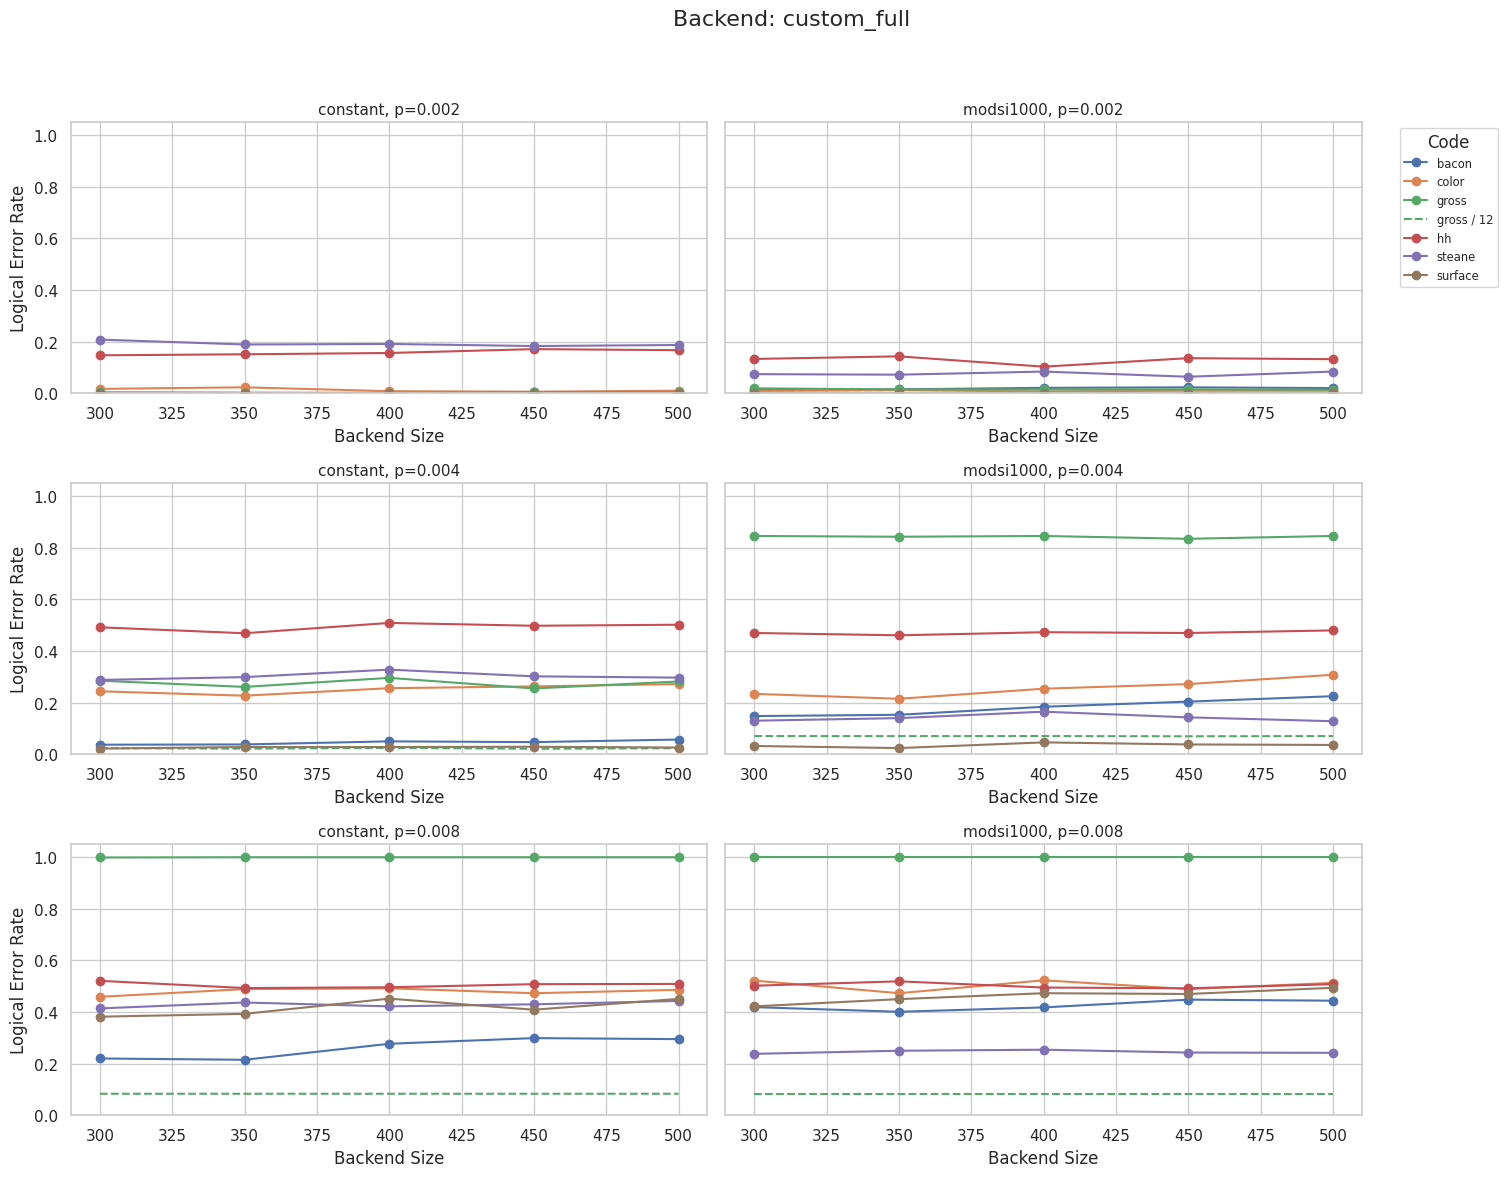

In [24]:
import matplotlib.pyplot as plt

# Error types and probabilities to show
error_types = ['constant', 'modsi1000']
error_probs = [0.002, 0.004, 0.008]

# Filter out heavyhex codes
df_filtered = df[~df['code'].str.contains('heavyhex', case=False, na=False)]
df_filtered = df_filtered[~df_filtered['backend'].str.contains('heavyhex', case=False, na=False)]


# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    fig, axes = plt.subplots(len(error_probs), len(error_types), figsize=(16, 12), sharey=True)

    fig.suptitle(f'Backend: {backend}', fontsize=16)

    for i, p in enumerate(error_probs):  # rows = error probabilities
        for j, et in enumerate(error_types):  # columns = error types
            ax = axes[i][j]
            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                group_sorted = group.sort_values('backend_size')

                # Plot gross line normally
                if code == 'gross':
                    line = ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                                   label=code, marker='o')
                    line_color = line[0].get_color()

                    # Dashed gross/12 line
                    gross_div12 = group_sorted['logical_error_rate'] / 12
                    ax.plot(group_sorted['backend_size'], gross_div12,
                            linestyle='--', color=line_color, label='gross / 12')
                else:
                    ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                            label=code, marker='o')

            # Titles and labels
            ax.set_title(f'{et}, p={p}', fontsize=11)
            ax.set_xlabel('Backend Size')
            if j == 0:
                ax.set_ylabel('Logical Error Rate')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            # Add legend only once
            if i == 0 and j == 1:
                ax.legend(title='Code', fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.savefig(f"../data/size/full.png")
    plt.show()




/tmp/ipykernel_41745/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_41745/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_41745/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_41745/806909549.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', font

FileNotFoundError: [Errno 2] No such file or directory: '/home/aswierkowska/eccentric_bench/data/Topology_size_27.05/mod_si_four_plots.png'

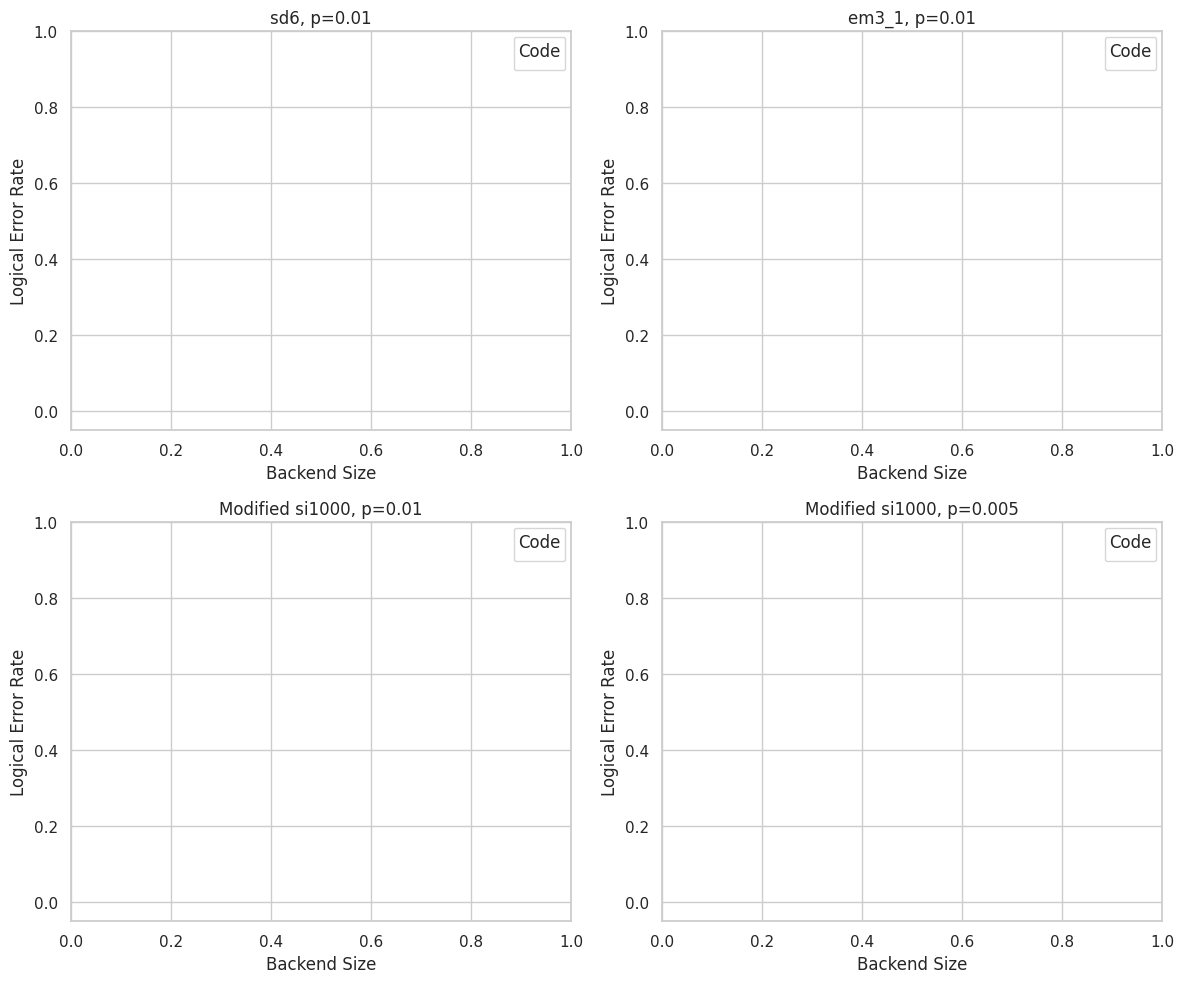

In [ ]:
import matplotlib.pyplot as plt

# Define combinations of error type and error probability
plot_params = [
    ('sd6', 0.01),
    ('em3_1', 0.01),
    ('si1000', 0.01),
    ('si1000', 0.005)
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index subplots

for idx, (et, p) in enumerate(plot_params):
    ax = axes[idx]
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    for code, group in subset.groupby('code'):
        group_sorted = group.sort_values('backend_size')
        ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                label=code, marker='o')
    if et == "si1000":
        et = "Modified si1000"
    ax.set_title(f'{et}, p={p}', fontsize=12)
    ax.set_xlabel('Backend Size')
    ax.set_ylabel('Logical Error Rate')
    ax.grid(True)
    ax.legend(title='Code', fontsize='x-small')
    ax.set_ylim(bottom=-0.05)

# Overall formatting
plt.tight_layout()
plt.savefig("../data/Topology_size_27.05/mod_si_four_plots.png")
plt.show()


In [15]:
df = pd.read_csv('../experiment_results/Topology_connectivity_31.05_20:45/results.csv')
print(df)
print("Total number of rows:", len(df))

         backend  backend_size   code decoder  distance  cycles  num_samples  \
0    custom_cube           729  gross   bposd       256       3         1000   
1    custom_cube           729  gross   bposd       256       3         1000   
2    custom_grid           729  gross   bposd       364       3         1000   
3    custom_cube           729  gross   bposd       256       3         1000   
4    custom_cube           729  gross   bposd       256       3         1000   
..           ...           ...    ...     ...       ...     ...          ...   
211  custom_line           729  color   bposd        17       3         1000   
212  custom_line           729  color   bposd        17       3         1000   
213  custom_grid           729  color   bposd        17       3         1000   
214  custom_grid           729  color   bposd        17       3         1000   
215  custom_grid           729  color   bposd        17       3         1000   

    error_type  error_probability  logi

In [ ]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,729,steane,bposd,27,3,1000,em3_1,0.010,0.000,NaN,NaN,NaN
1,custom_full,729,gross,bposd,364,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
2,custom_full,729,gross,bposd,364,3,1000,em3_2,0.010,0.000,NaN,NaN,NaN
3,custom_full,729,steane,bposd,27,3,1000,em3_1,0.015,0.000,NaN,NaN,NaN
4,custom_full,729,gross,bposd,364,3,1000,em3_2,0.015,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,custom_full,729,hh,bposd,17,3,1000,sd6,0.010,0.481,NaN,NaN,NaN
59,custom_full,729,hh,bposd,17,3,1000,sd6,0.015,0.464,NaN,NaN,NaN
60,custom_full,729,color,bposd,17,3,1000,sd6,0.010,0.391,NaN,NaN,NaN
61,custom_full,729,color,bposd,17,3,1000,sd6,0.050,0.498,NaN,NaN,NaN


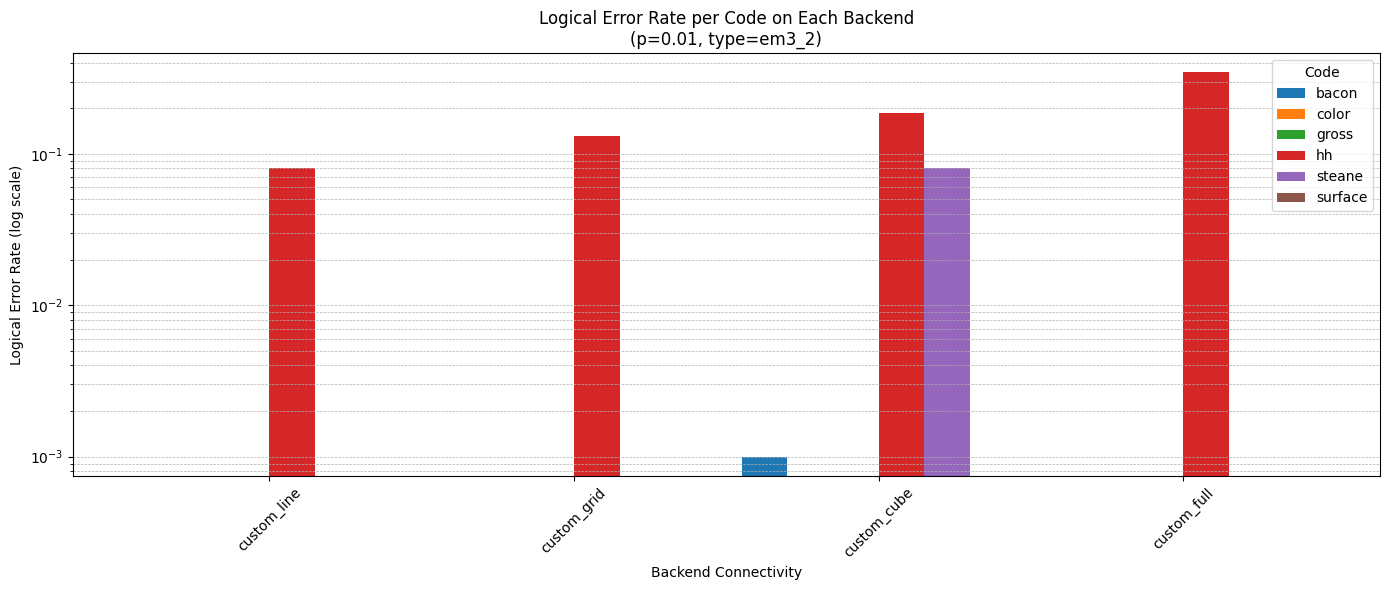

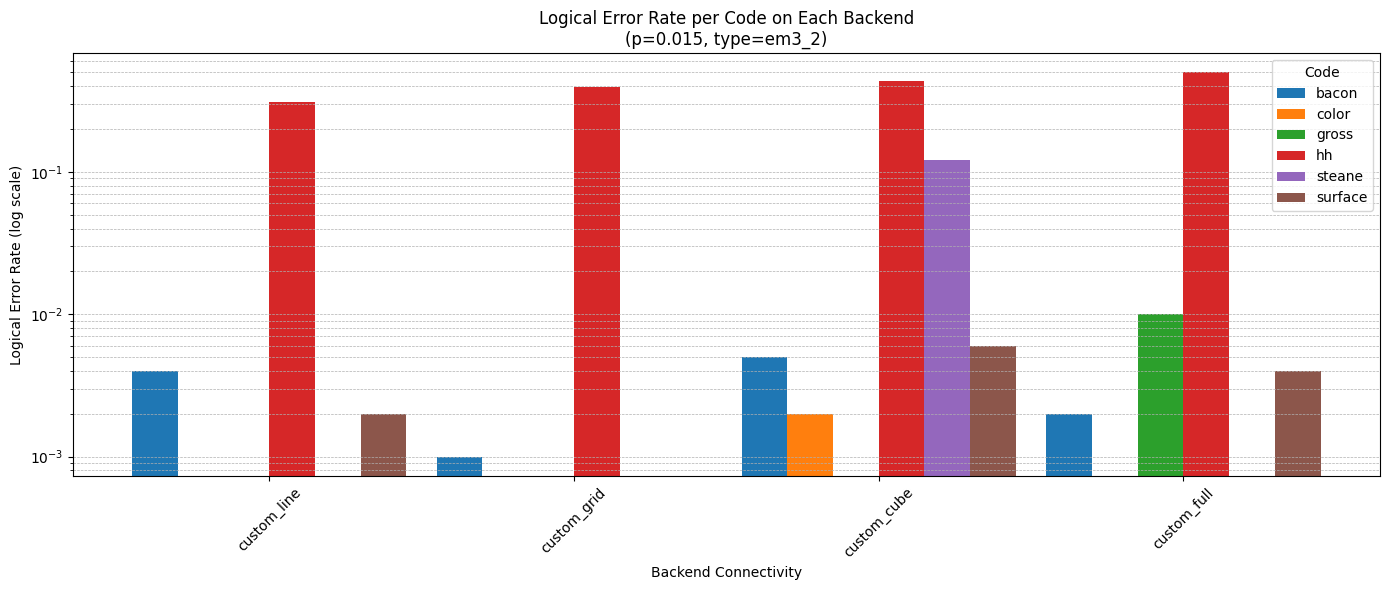

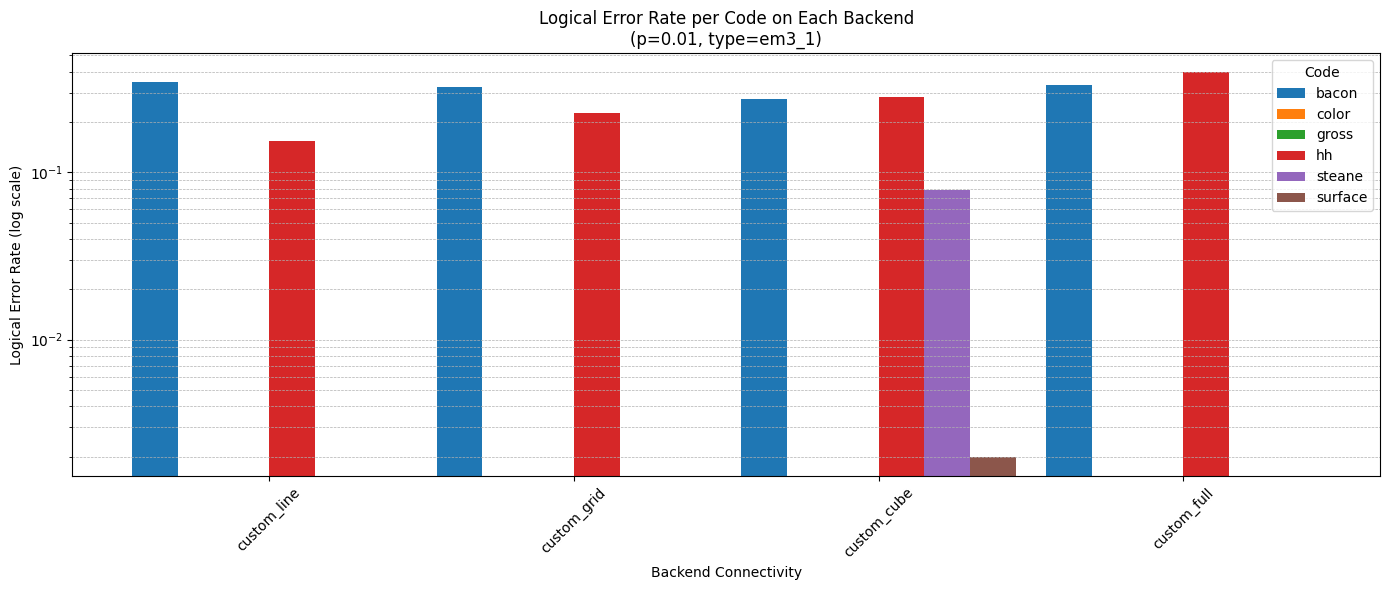

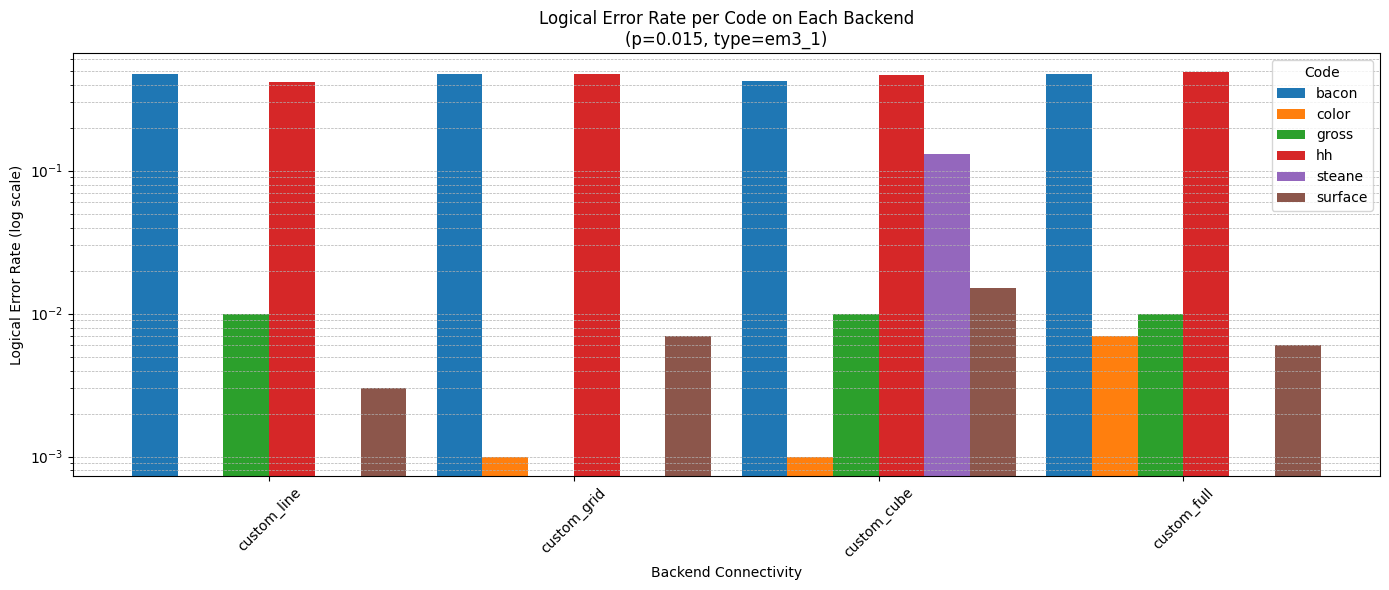

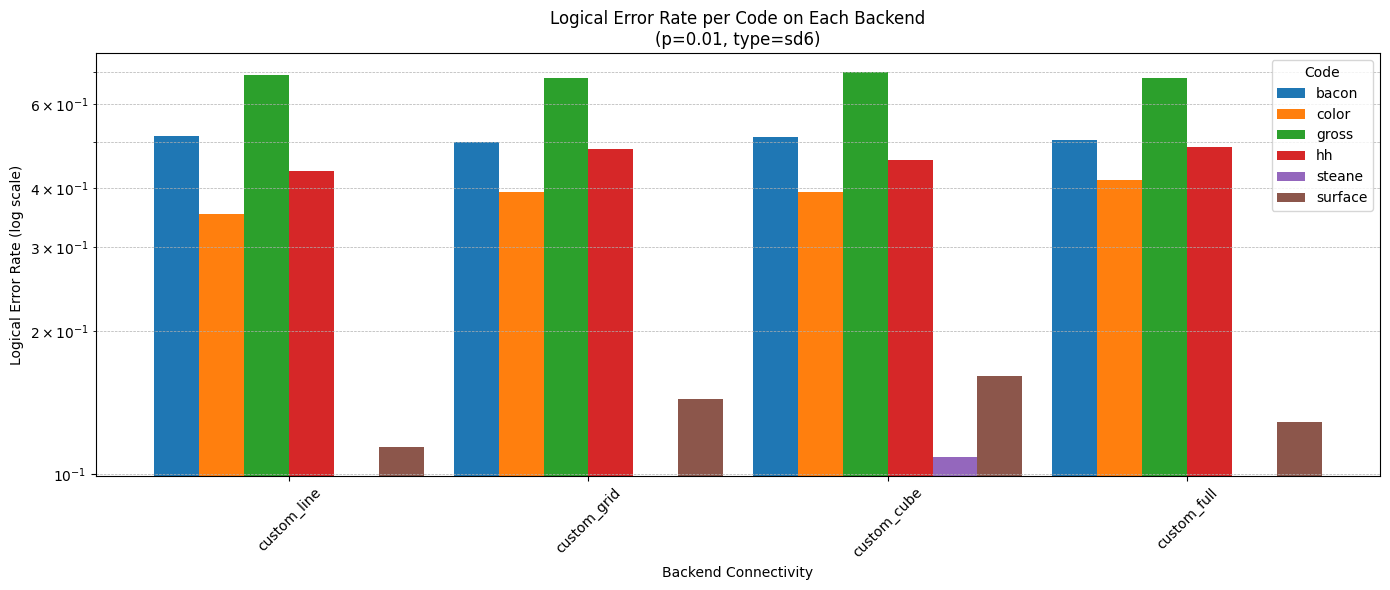

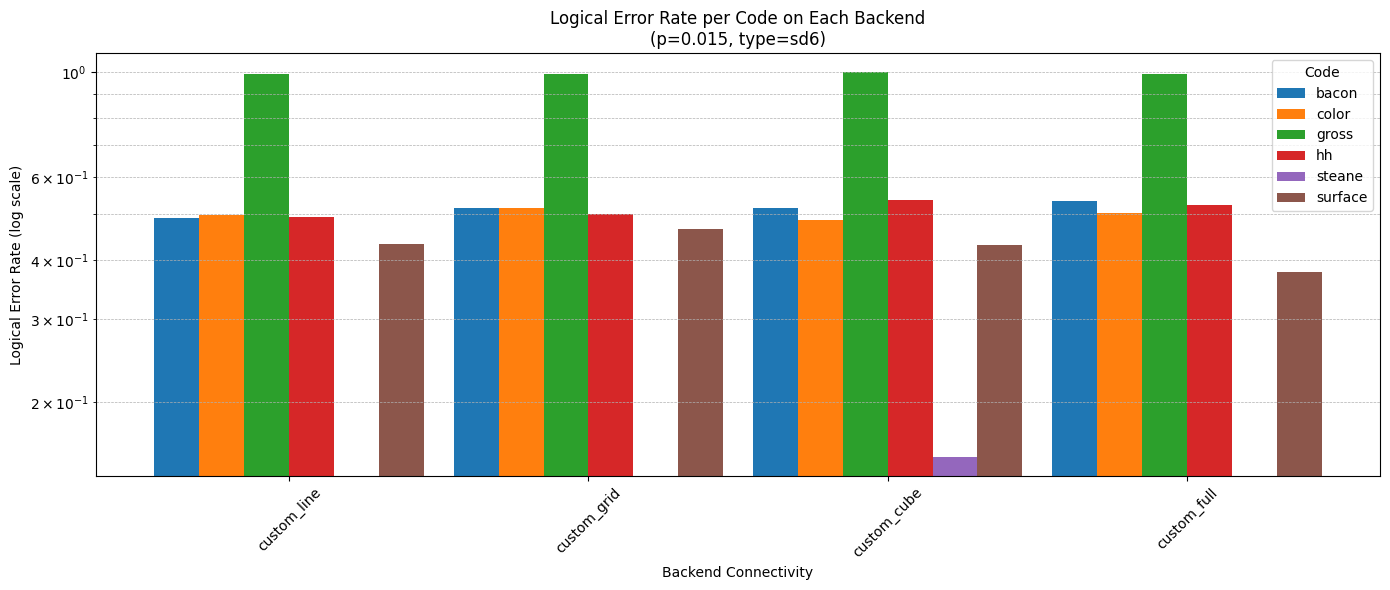

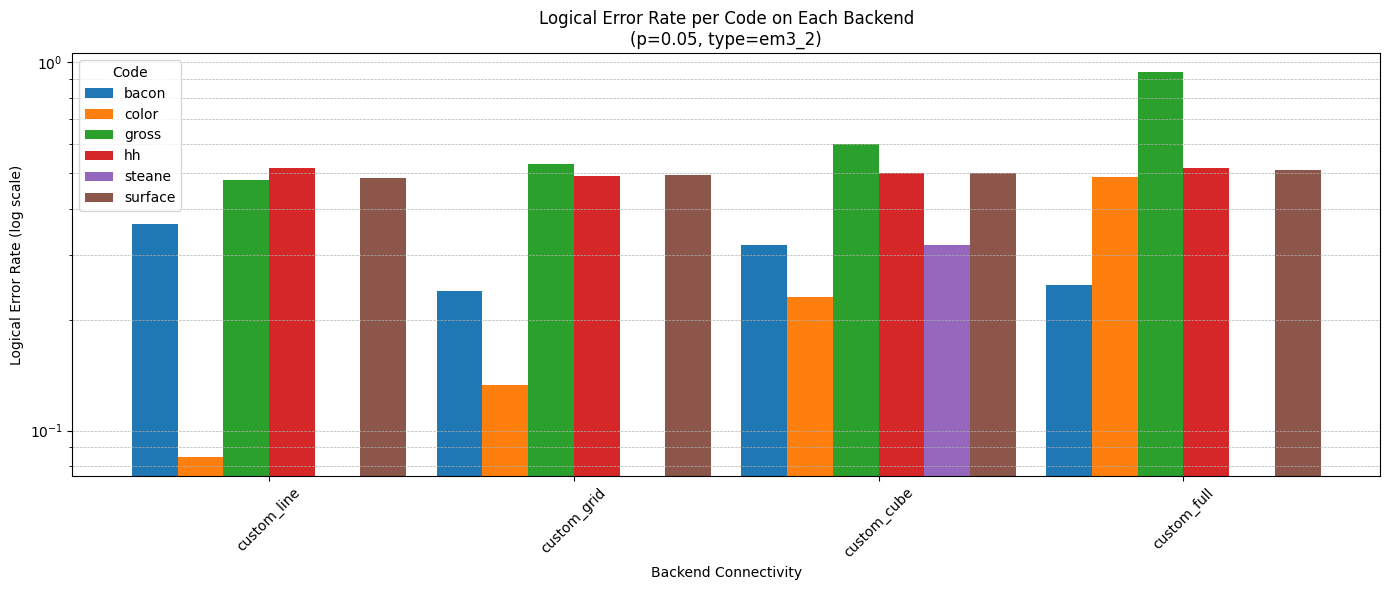

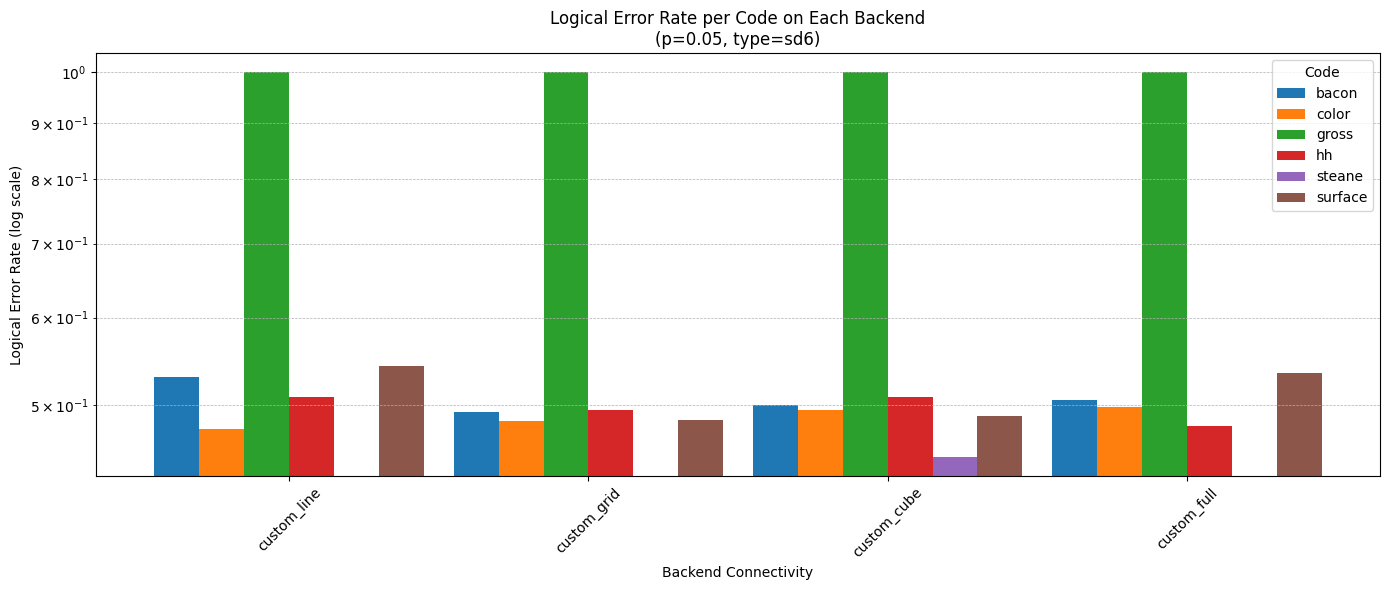

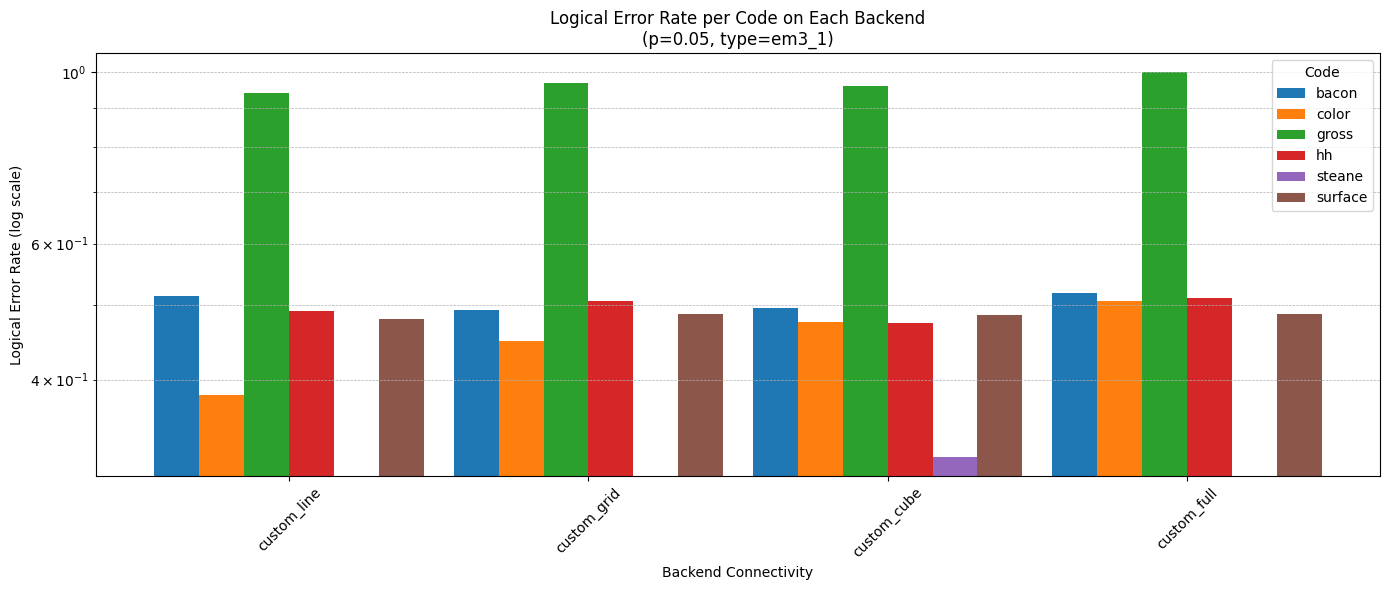

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom backend order
custom_order = ['custom_line', 'custom_grid', 'custom_cube', 'custom_full']

# Get all unique combinations of error_probability and error_type
combinations = df[['error_probability', 'error_type']].drop_duplicates()

# Loop through each combination
for _, row in combinations.iterrows():
    p = row['error_probability']
    et = row['error_type']

    # Filter the subset
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    # Create pivot table and reindex
    pivot_df = subset.pivot_table(index='backend', columns='code', values='logical_error_rate', aggfunc='mean')
    pivot_df = pivot_df.reindex(custom_order)

    # Skip empty or invalid plots
    if pivot_df.dropna(how='all').empty:
        continue

    # Prepare plot data
    backends = pivot_df.index
    codes = pivot_df.columns
    x = np.arange(len(backends))
    width = 0.15

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, code in enumerate(codes):
        ax.bar(x + i * width, pivot_df[code], width, label=code)

    # Formatting
    ax.set_yscale('log')  # Logarithmic scale for error rate
    ax.set_xlabel('Backend Connectivity')
    ax.set_ylabel('Logical Error Rate (log scale)')
    ax.set_title(f'Logical Error Rate per Code on Each Backend\n(p={p}, type={et})')
    ax.set_xticks(x + width * (len(codes) - 1) / 2)
    ax.set_xticklabels(backends, rotation=45)
    ax.legend(title='Code')
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    # Optional: save to file
    # plt.savefig(f"barplot_{et}_p{str(p).replace('.', '')}.png")
    plt.show()


In [2]:
import pandas as pd
df_decoders = pd.read_csv("../experiment_results/test_decoders/results.csv")

In [5]:
df_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
5,bacon,bposd_faster,0.040
11,bacon,bposd_gross,0.043
16,color,bposd_gross,0.249
4,color,mwpm,0.504
10,color,bposd_faster,0.296
13,gross,bposd_gross,0.269
7,gross,bposd_faster,0.304
14,hh,bposd_gross,0.447
8,hh,bposd_faster,0.462


In [3]:
best_decoders = df_decoders.loc[df_decoders.groupby("code")["logical_error_rate"].idxmin()]
best_decoders = best_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")
display(best_decoders)

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
16,color,bposd_gross,0.249
13,gross,bposd_gross,0.269
14,hh,bposd_gross,0.447
12,steane,bposd_gross,0.124
15,surface,bposd_gross,0.021


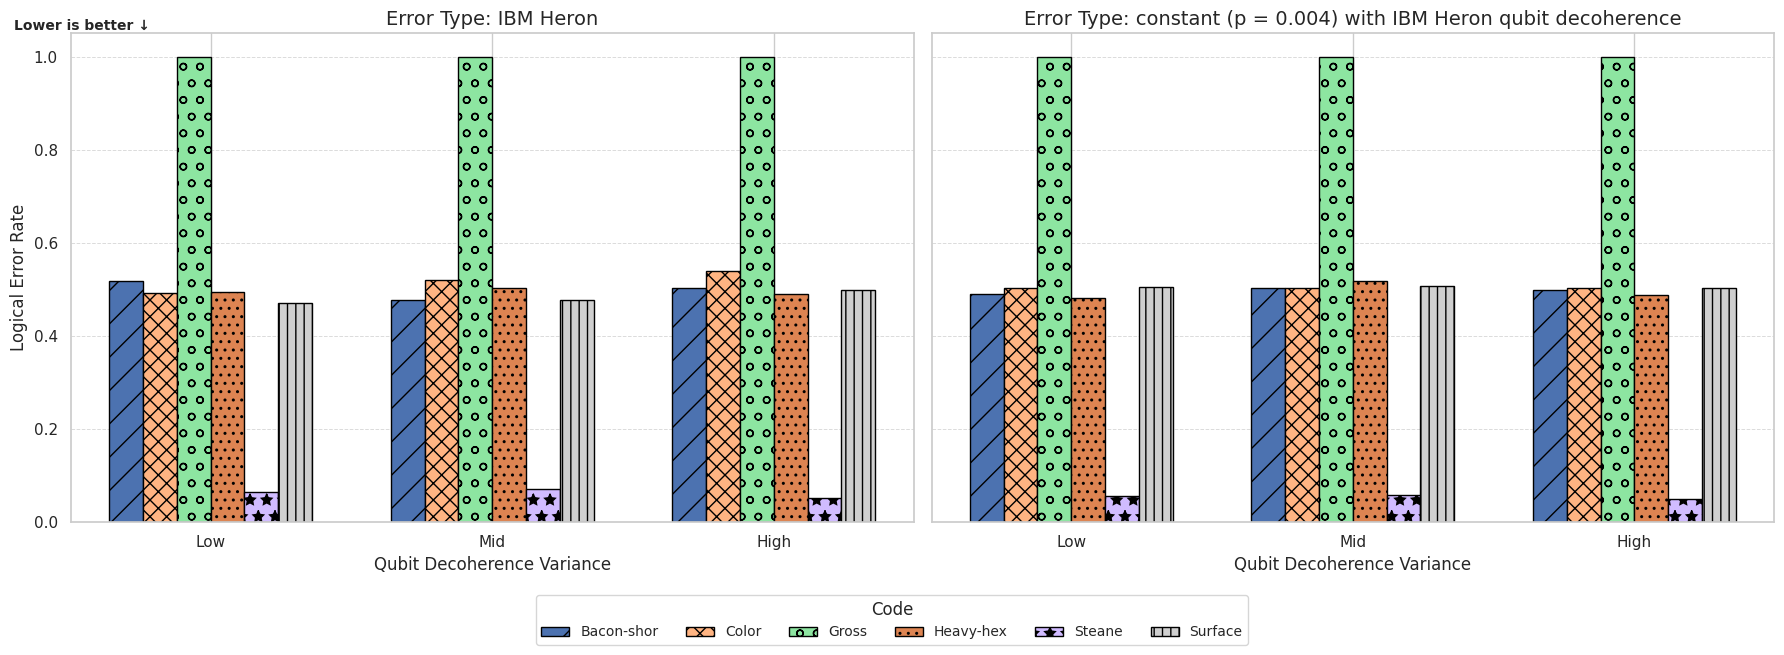

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../experiment_results/Variance_25.06/results.csv")

# Format code names
def format_code(code):
    code = code.capitalize()
    if code == "Bacon":
        return "Bacon-Shor"
    elif code == "Hh":
        return "Heavy-Hex"
    return code

df["code"] = df["code"].apply(format_code)

# Create color map AFTER formatting
unique_codes = sorted(df["code"].unique())
base_palette = sns.color_palette("pastel", n_colors=2*len(unique_codes))
colors = {}
for idx, c in enumerate(unique_codes):
    if idx == 5:
        colors[c] = base_palette[idx+2]
    else:
        colors[c] = base_palette[idx]

# More unique hatches
hatches = ["/", "xx", "o", "..", "*", "||"]

# Define custom backend order and labels
custom_order = ['variance_low', 'variance_mid', 'variance_high']
backend_labels = ["Low", "Mid", "High"]  # for tick labels

# Plot settings
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Get unique error types and probabilities
error_types = df["error_type"].unique()
error_prob = sorted(df["error_probability"].unique())

# Loop through each error type (use two subplots: one for each type)
for idx, et in enumerate(error_types):
    ax = axes[idx]
    for p in error_prob:
        subset = df[(df["error_type"] == et) & (df["error_probability"] == p)]

        if subset.empty:
            continue

        pivot = subset.pivot_table(
            index="backend",
            columns="code",
            values="logical_error_rate",
            aggfunc="mean"
        ).reindex(custom_order)

        # Re-format column names again just in case
        pivot.columns = [format_code(col) for col in pivot.columns]

        codes = pivot.columns
        x = np.arange(len(custom_order))
        width = 0.12

        for i, code in enumerate(codes):
            bars = ax.bar(
                x + i * width,
                pivot[code],
                width=width,
                label=code if idx == 1 else "",
                color=colors.get(code),
                hatch=hatches[i % len(hatches)],
                edgecolor="black"
            )

        # Axis formatting
        #ax.set_yscale("log")
        ax.set_xticks(x + width * (len(codes) - 1) / 2)
        ax.set_xticklabels(backend_labels, rotation=0)
        if et == "real_heron":
            ax.set_title(f"Error Type: IBM Heron", fontsize=14)
        else:
            ax.set_title(f"Error Type: constant (p = {p}) with IBM Heron qubit decoherence", fontsize=14)
        ax.set_xlabel("Qubit Decoherence Variance")
        if idx == 0:
            ax.set_ylabel("Logical Error Rate")

        # More Y-ticks (log scale)
        y_min, y_max = ax.get_ylim()
        #yticks = np.logspace(np.log10(y_min), np.log10(y_max), num=10)
        #ax.set_yticks(yticks)
        ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
        ax.yaxis.set_minor_formatter(plt.NullFormatter())

        # Add grid lines manually
        ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

        # Add note
axes[0].text(
    -0.4,
    y_max * 1.04,
    "Lower is better ↓",
    fontsize=12,
    fontweight="bold",
    verticalalignment="top",
    horizontalalignment="left"
)

# Legend and layout
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="Code",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(labels),  # all labels in one row
    frameon=True,
    fontsize=12,
    title_fontsize=12
)
plt.tight_layout()
plt.savefig("../data/variance/variance.png")
plt.show()
